# 전처리 방안 

## 내부데이터

기본적으로 방송일시를 이용해서 연,월,일,시간, 요일, 공휴일 변수를 만들자

Zapping Time에 대해서도 생각!

어떤 때에 판매단가가 높았는지에 대해 알아볼 수 있는 방법이 없을까?

마더코드는 브랜드별을 의미 -> 그러면 구매파워가 강한 브랜드가 있지 않을까?

방송길이와 매출액의 관계도 생각해보자.

## 외부데이터


외출정도를 확인해볼 수 있는 기상정보와, 타 방송사 프로그램 시청률 등을 외부 데이터로 사용해봐도 좋을듯

모바일 

브랜드

이혜정의 빅쇼: 화요일 오후 6:30
김선희의 lounge v: 수 오전 11:35, 목 오전 10:25
김성은의 스타일프로포즈: 수 오후 10:50


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [3]:
import platform                
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

In [49]:
os.listdir()

['01_제공데이터',
 '원본.csv',
 '.DS_Store',
 '02_평가데이터',
 '노출시간sum.csv',
 '원본.csv.zip']

In [12]:
os.chdir('/Users/leeminho/Desktop/leemingo/competition/bigcontest/2020빅콘테스트 문제데이터(데이터분석분야-챔피언리그)')

In [14]:
df = pd.read_csv('변수추가.csv')
df

,Unnamed: 0,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,평균 시청률,평균단가,평균개수,년,월,일,시,분,소비층,요일
0,0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,0.000000,39900.0,52.606516,2019,1,1,6,0,1,Tuesday
1,1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,0.000000,39900.0,109.548872,2019,1,1,6,0,1,Tuesday
2,2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,0.000000,39900.0,81.754386,2019,1,1,6,20,1,Tuesday
3,3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,0.000000,39900.0,174.310777,2019,1,1,6,20,1,Tuesday
4,4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,0.000000,39900.0,167.218045,2019,1,1,6,40,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35370,38295,2019-12-31 23:20:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,1664000.0,0.000000,148000.0,11.243243,2019,12,31,23,20,2,Tuesday
35371,38296,2019-12-31 23:40:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,9149000.0,0.020222,178000.0,51.398876,2019,12,31,23,40,2,Tuesday
35372,38297,2019-12-31 23:40:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,15282000.0,0.020222,168000.0,90.964286,2019,12,31,23,40,2,Tuesday
35373,38298,2019-12-31 23:40:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,2328000.0,0.020222,158000.0,14.734177,2019,12,31,23,40,2,Tuesday


In [15]:
del df['Unnamed: 0']

In [16]:
sub = pd.read_excel('./02_평가데이터/2020 빅콘테스트 데이터분석분야-챔피언리그_2020년 6월 판매실적예측데이터(평가데이터).xlsx', header = 1)
sub.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2020-06-01 06:20:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
1,2020-06-01 06:40:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
2,2020-06-01 07:00:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
3,2020-06-01 07:20:00,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN
4,2020-06-01 07:40:00,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN


In [23]:
df

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,평균단가,년,월,일,시,분,소비층,요일
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,39900.0,2019,1,1,6,0,1,Tuesday
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,39900.0,2019,1,1,6,0,1,Tuesday
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,39900.0,2019,1,1,6,20,1,Tuesday
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,39900.0,2019,1,1,6,20,1,Tuesday
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,39900.0,2019,1,1,6,40,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35370,2019-12-31 23:20:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,1664000.0,148000.0,2019,12,31,23,20,2,Tuesday
35371,2019-12-31 23:40:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,9149000.0,178000.0,2019,12,31,23,40,2,Tuesday
35372,2019-12-31 23:40:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,15282000.0,168000.0,2019,12,31,23,40,2,Tuesday
35373,2019-12-31 23:40:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,2328000.0,158000.0,2019,12,31,23,40,2,Tuesday


## 결측치 처리 

In [17]:
df[df['취급액'].isnull()]

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,평균 시청률,평균단가,평균개수,년,월,일,시,분,소비층,요일


판매단가가 0인 경우, 취급액이 결측치로 처리. 모두 제거하고 진행해야 한다.

In [18]:
df[df['취급액'] == 50000]

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,평균 시청률,평균단가,평균개수,년,월,일,시,분,소비층,요일


현재 취급액이 50000원으로 잡힌 경우는 잘못 측정된 것으로, 모두 제거해주어야 함

In [58]:
df.loc[df['취급액'].isnull()] = 0
df.loc[df['취급액'] == 50000]  = 0
df = df[df['취급액'] != 0]
df

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,평균 시청률,평균단가,평균개수
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,0.000000,39900.0,52.606516
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,0.000000,39900.0,109.548872
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,0.000000,39900.0,81.754386
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,0.000000,39900.0,174.310777
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,0.000000,39900.0,167.218045
...,...,...,...,...,...,...,...,...,...,...,...
38295,2019-12-31 23:20:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,1664000.0,0.000000,148000.0,11.243243
38296,2019-12-31 23:40:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,9149000.0,0.020222,178000.0,51.398876
38297,2019-12-31 23:40:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,15282000.0,0.020222,168000.0,90.964286
38298,2019-12-31 23:40:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,2328000.0,0.020222,158000.0,14.734177


In [19]:
df

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,평균 시청률,평균단가,평균개수,년,월,일,시,분,소비층,요일
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,0.000000,39900.0,52.606516,2019,1,1,6,0,1,Tuesday
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,0.000000,39900.0,109.548872,2019,1,1,6,0,1,Tuesday
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,0.000000,39900.0,81.754386,2019,1,1,6,20,1,Tuesday
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,0.000000,39900.0,174.310777,2019,1,1,6,20,1,Tuesday
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,0.000000,39900.0,167.218045,2019,1,1,6,40,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35370,2019-12-31 23:20:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,1664000.0,0.000000,148000.0,11.243243,2019,12,31,23,20,2,Tuesday
35371,2019-12-31 23:40:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,9149000.0,0.020222,178000.0,51.398876,2019,12,31,23,40,2,Tuesday
35372,2019-12-31 23:40:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,15282000.0,0.020222,168000.0,90.964286,2019,12,31,23,40,2,Tuesday
35373,2019-12-31 23:40:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,2328000.0,0.020222,158000.0,14.734177,2019,12,31,23,40,2,Tuesday


## 년, 월, 일, 시, 분 Column 생성 

In [29]:
df['년'] = df['방송일시'].apply(lambda x : x[:4])

In [30]:
df['월'] = df['방송일시'].apply(lambda x: x[5:7])
df['일'] = df['방송일시'].apply(lambda x: x[8:10])
df['시'] = df['방송일시'].apply(lambda x: x[11:13])
df['분'] = df['방송일시'].apply(lambda x: x[14:16])

In [31]:
df

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,평균단가,년,월,일,시,분,소비층,요일,휴일
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,39900.0,2019,01,01,06,00,1,Tuesday,0
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,39900.0,2019,01,01,06,00,1,Tuesday,0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,39900.0,2019,01,01,06,20,1,Tuesday,0
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,39900.0,2019,01,01,06,20,1,Tuesday,0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,39900.0,2019,01,01,06,40,1,Tuesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35370,2019-12-31 23:20:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,1664000.0,148000.0,2019,12,31,23,20,2,Tuesday,0
35371,2019-12-31 23:40:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,9149000.0,178000.0,2019,12,31,23,40,2,Tuesday,0
35372,2019-12-31 23:40:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,15282000.0,168000.0,2019,12,31,23,40,2,Tuesday,0
35373,2019-12-31 23:40:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,2328000.0,158000.0,2019,12,31,23,40,2,Tuesday,0


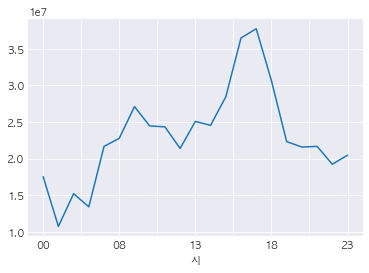

In [22]:
df.groupby(['시']).mean()['취급액'].plot()

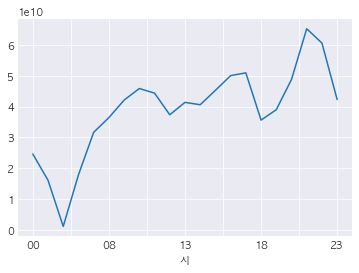

In [23]:
df.groupby(['시']).sum()['취급액'].plot()

## 노출시간 변수화

In [25]:
df['취급액_log'] = np.log1p(df['취급액'])
df

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,평균 시청률,년,월,일,시,분,취급액_log
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,0.000000,2019,01,01,06,00,14.556972
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,0.000000,2019,01,01,06,00,15.290503
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,0.000000,2019,01,01,06,20,14.997851
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,0.000000,2019,01,01,06,20,15.754972
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,0.000000,2019,01,01,06,40,15.713430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38295,2019-12-31 23:20:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,1664000.0,0.000000,2019,12,31,23,20,14.324736
38296,2019-12-31 23:40:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,9149000.0,0.020222,2019,12,31,23,40,16.029155
38297,2019-12-31 23:40:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,15282000.0,0.020222,2019,12,31,23,40,16.542186
38298,2019-12-31 23:40:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,2328000.0,0.020222,2019,12,31,23,40,14.660521


In [26]:
df.groupby(['상품명', '년', '월', '일']).sum()[['노출(분)', '취급액_log']].corr(method = 'pearson')

,노출(분),취급액_log
노출(분),1.000000,0.812446
취급액_log,0.812446,1.000000


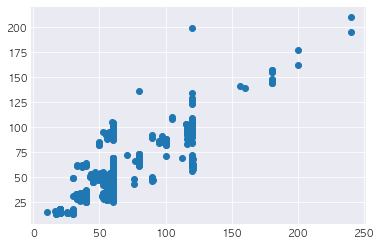

In [27]:
plt.scatter(df.groupby(['상품명', '년', '월', '일']).sum()['노출(분)'] , 
            df.groupby(['상품명', '년', '월', '일']).sum()['취급액_log'])

둘이 높은 상관관계

-> 그렇다면 어떻게 변수로 만들어줄 것인지?

In [28]:
#노출시간과 취급액은 합해서
df2 = df.groupby(['마더코드', '상품코드','상품명', '상품군', '판매단가', '년', '월', '일']).sum()
df2 = df2.reset_index()
del df2['평균 시청률']
df2

,마더코드,상품코드,상품명,상품군,판매단가,년,월,일,노출(분),취급액,취급액_log
0,100000,200000,엘로엘 아쿠아클린 마스크,이미용,79900,2019,08,26,60.0,47611000.0,49.691965
1,100000,200000,엘로엘 아쿠아클린 마스크,이미용,79900,2019,08,30,55.0,28951000.0,48.110018
2,100001,200001,국내생산 스텐락 심플 스텐밀폐용기 17종,주방,99000,2019,01,25,60.0,87062000.0,35.131117
3,100001,200001,국내생산 스텐락 심플 스텐밀폐용기 17종,주방,99000,2019,02,01,60.0,64274000.0,34.449778
4,100002,200002,이보은의 우삽겹 12팩세트,농수축,49900,2019,10,29,60.0,128483000.0,52.673033
...,...,...,...,...,...,...,...,...,...,...,...
12571,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,농수축,58900,2019,11,14,60.0,129387000.0,52.662739
12572,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,농수축,58900,2019,12,05,20.0,52542000.0,17.777123
12573,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,농수축,58900,2019,12,11,20.0,45331000.0,17.629502
12574,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,농수축,58900,2019,12,14,20.0,51303000.0,17.753260


In [29]:
#시청률은 평균내서
df3 = df.groupby(['마더코드', '상품코드','상품명', '상품군', '판매단가', '년', '월', '일']).mean()
df3 = df3.reset_index()
del df3['노출(분)']
del df3['취급액']
del df3['취급액_log']
df3

,마더코드,상품코드,상품명,상품군,판매단가,년,월,일,평균 시청률
0,100000,200000,엘로엘 아쿠아클린 마스크,이미용,79900,2019,08,26,0.000000
1,100000,200000,엘로엘 아쿠아클린 마스크,이미용,79900,2019,08,30,0.006214
2,100001,200001,국내생산 스텐락 심플 스텐밀폐용기 17종,주방,99000,2019,01,25,0.011143
3,100001,200001,국내생산 스텐락 심플 스텐밀폐용기 17종,주방,99000,2019,02,01,0.000375
4,100002,200002,이보은의 우삽겹 12팩세트,농수축,49900,2019,10,29,0.004944
...,...,...,...,...,...,...,...,...,...
12571,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,농수축,58900,2019,11,14,0.001463
12572,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,농수축,58900,2019,12,05,0.002278
12573,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,농수축,58900,2019,12,11,0.024556
12574,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,농수축,58900,2019,12,14,0.010000


In [30]:
df4 = pd.merge(df2, df3)
df4

,마더코드,상품코드,상품명,상품군,판매단가,년,월,일,노출(분),취급액,취급액_log,평균 시청률
0,100000,200000,엘로엘 아쿠아클린 마스크,이미용,79900,2019,08,26,60.0,47611000.0,49.691965,0.000000
1,100000,200000,엘로엘 아쿠아클린 마스크,이미용,79900,2019,08,30,55.0,28951000.0,48.110018,0.006214
2,100001,200001,국내생산 스텐락 심플 스텐밀폐용기 17종,주방,99000,2019,01,25,60.0,87062000.0,35.131117,0.011143
3,100001,200001,국내생산 스텐락 심플 스텐밀폐용기 17종,주방,99000,2019,02,01,60.0,64274000.0,34.449778,0.000375
4,100002,200002,이보은의 우삽겹 12팩세트,농수축,49900,2019,10,29,60.0,128483000.0,52.673033,0.004944
...,...,...,...,...,...,...,...,...,...,...,...,...
12571,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,농수축,58900,2019,11,14,60.0,129387000.0,52.662739,0.001463
12572,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,농수축,58900,2019,12,05,20.0,52542000.0,17.777123,0.002278
12573,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,농수축,58900,2019,12,11,20.0,45331000.0,17.629502,0.024556
12574,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,농수축,58900,2019,12,14,20.0,51303000.0,17.753260,0.010000


In [31]:
df4[['취급액', '노출(분)']].corr()

,취급액,노출(분)
취급액,1.000000,0.375303
노출(분),0.375303,1.000000


In [33]:
df4['취급액_log_after'] = np.log1p(df4['취급액'])
df4[['취급액_log_after', '노출(분)']].corr()

,취급액_log_after,노출(분)
취급액_log_after,1.000000,0.440211
노출(분),0.440211,1.000000


In [32]:
df4[['노출(분)', '취급액_log']].corr()

,노출(분),취급액_log
노출(분),1.000000,0.812071
취급액_log,0.812071,1.000000


In [34]:
df4

,마더코드,상품코드,상품명,상품군,판매단가,년,월,일,노출(분),취급액,취급액_log,평균 시청률,취급액_log_after
0,100000,200000,엘로엘 아쿠아클린 마스크,이미용,79900,2019,08,26,60.0,47611000.0,49.691965,0.000000,17.678574
1,100000,200000,엘로엘 아쿠아클린 마스크,이미용,79900,2019,08,30,55.0,28951000.0,48.110018,0.006214,17.181115
2,100001,200001,국내생산 스텐락 심플 스텐밀폐용기 17종,주방,99000,2019,01,25,60.0,87062000.0,35.131117,0.011143,18.282131
3,100001,200001,국내생산 스텐락 심플 스텐밀폐용기 17종,주방,99000,2019,02,01,60.0,64274000.0,34.449778,0.000375,17.978666
4,100002,200002,이보은의 우삽겹 12팩세트,농수축,49900,2019,10,29,60.0,128483000.0,52.673033,0.004944,18.671307
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12571,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,농수축,58900,2019,11,14,60.0,129387000.0,52.662739,0.001463,18.678318
12572,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,농수축,58900,2019,12,05,20.0,52542000.0,17.777123,0.002278,17.777123
12573,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,농수축,58900,2019,12,11,20.0,45331000.0,17.629502,0.024556,17.629502
12574,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,농수축,58900,2019,12,14,20.0,51303000.0,17.753260,0.010000,17.753260


미리 log를 한것끼리 더한거랑 오히려 상관관계가 높다

-> 왜 그런지 생각해봐야...!

## 마더코드, 상품코드 분석 

In [144]:
df

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,평균 시청률,취급액_log,년,월,일,시,분
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,0.000000,14.556972,2019,01,01,06,00
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,0.000000,15.290503,2019,01,01,06,00
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,0.000000,14.997851,2019,01,01,06,20
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,0.000000,15.754972,2019,01,01,06,20
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,0.000000,15.713430,2019,01,01,06,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38295,2019-12-31 23:20:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,1664000.0,0.000000,14.324736,2019,12,31,23,20
38296,2019-12-31 23:40:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,9149000.0,0.020222,16.029155,2019,12,31,23,40
38297,2019-12-31 23:40:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,15282000.0,0.020222,16.542186,2019,12,31,23,40
38298,2019-12-31 23:40:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,2328000.0,0.020222,14.660521,2019,12,31,23,40


In [160]:
np.sort(df['마더코드'].unique())

array([100000, 100001, 100002, 100006, 100009, 100010, 100013, 100015,
       100016, 100017, 100018, 100019, 100020, 100021, 100022, 100023,
       100024, 100025, 100026, 100027, 100028, 100029, 100031, 100032,
       100033, 100034, 100036, 100037, 100038, 100039, 100040, 100041,
       100042, 100043, 100044, 100045, 100046, 100047, 100048, 100049,
       100050, 100051, 100052, 100053, 100054, 100055, 100056, 100057,
       100058, 100061, 100062, 100063, 100064, 100065, 100066, 100067,
       100069, 100070, 100074, 100075, 100076, 100078, 100079, 100080,
       100081, 100083, 100084, 100085, 100086, 100087, 100088, 100089,
       100090, 100091, 100093, 100094, 100095, 100096, 100097, 100098,
       100099, 100100, 100101, 100102, 100103, 100104, 100107, 100109,
       100111, 100112, 100113, 100114, 100115, 100117, 100118, 100124,
       100125, 100126, 100127, 100128, 100129, 100130, 100131, 100132,
       100134, 100135, 100136, 100139, 100140, 100142, 100143, 100144,
      

In [252]:
sub

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2020-06-01 06:20:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
1,2020-06-01 06:40:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
2,2020-06-01 07:00:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
3,2020-06-01 07:20:00,20.000000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN
4,2020-06-01 07:40:00,20.000000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN
...,...,...,...,...,...,...,...,...
2886,2020-07-01 00:20:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,NaN
2887,2020-07-01 00:40:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,NaN
2888,2020-07-01 01:00:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,NaN
2889,2020-07-01 01:20:00,20.000000,100261,200875,아놀드파마 티셔츠레깅스세트,의류,69900,NaN


In [249]:
df[['취급액_log', '판매량', '판매단가', '평균 시청률']].corr()

,취급액_log,판매량,판매단가,평균 시청률
취급액_log,1.000000,0.641823,-0.151371,0.054995
판매량,0.641823,1.000000,-0.369407,0.072978
판매단가,-0.151371,-0.369407,1.000000,-0.012750
평균 시청률,0.054995,0.072978,-0.012750,1.000000


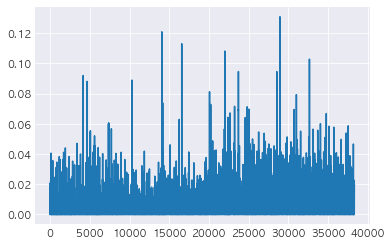

In [251]:
df['평균 시청률'].plot()

마더코드와 상품코드가 같이 높아지는 편

-> 그냥 순서대로 붙인거일 가능성...? 그렇다면 무슨 순서로 붙인것일까

In [242]:
df.sort_values(['취급액'], ascending = False)

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,평균 시청률,취급액_log,년,월,일,시,분
35784,2019-12-07 01:40:00,17.166667,100418,201322,코몽트 덤블 플리스 자켓 2종,의류,39900,322009000.0,0.017733,19.590090,2019,12,07,01,40
37861,2019-12-27 00:00:00,20.000000,100323,201025,피시원 국내산 햇 손질문어 7팩,농수축,49900,270284000.0,0.000000,19.414984,2019,12,27,00,00
34385,2019-11-22 19:00:00,20.000000,100317,201665,국내산 손질 햇 갑오징어 9팩,농수축,49900,241079000.0,0.000000,19.300635,2019,11,22,19,00
35045,2019-11-29 23:00:00,20.000000,100148,200412,LG 울트라HD TV 65UM7900BNA,가전,1700000,231789000.0,0.000000,19.261338,2019,11,29,23,00
32371,2019-11-02 17:40:00,20.000000,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,농수축,58900,228177000.0,0.011333,19.245632,2019,11,02,17,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33229,2019-11-11 01:20:00,20.000000,100395,201272,1세트 센티멘탈 디퓨저골드,생활용품,31000,181000.0,0.000000,12.106258,2019,11,11,01,20
37051,2019-12-18 14:00:00,20.000000,100395,201272,1세트 센티멘탈 디퓨저골드,생활용품,31000,179000.0,0.003056,12.095147,2019,12,18,14,00
24221,2019-08-15 23:00:00,20.000000,100791,202352,도루코 페이스5 면도날 4개입,생활용품,12800,157000.0,0.010389,11.964007,2019,08,15,23,00
24227,2019-08-15 23:40:00,20.000000,100791,202352,도루코 페이스5 면도날 4개입,생활용품,12800,103000.0,0.000000,11.542494,2019,08,15,23,40


In [35]:
df['판매량'] = df['취급액'] / df['판매단가']
df.sort_values(['판매량'], ascending = False)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,평균 시청률,년,월,일,시,분,취급액_log,판매량
35784,2019-12-07 01:40:00,17.166667,100418,201322,코몽트 덤블 플리스 자켓 2종,의류,39900,322009000.0,0.017733,2019,12,07,01,40,19.590090,8070.401003
33178,2019-11-10 17:00:00,20.000000,100253,200864,안동간고등어 20팩,농수축,30900,199541000.0,0.001778,2019,11,10,17,00,19.111530,6457.637540
37356,2019-12-21 17:40:00,20.000000,100418,201322,코몽트 덤블 플리스 자켓 2종,의류,39900,223492000.0,0.000944,2019,12,21,17,40,19.224886,5601.303258
37861,2019-12-27 00:00:00,20.000000,100323,201025,피시원 국내산 햇 손질문어 7팩,농수축,49900,270284000.0,0.000000,2019,12,27,00,00,19.414984,5416.513026
34385,2019-11-22 19:00:00,20.000000,100317,201665,국내산 손질 햇 갑오징어 9팩,농수축,49900,241079000.0,0.000000,2019,11,22,19,00,19.300635,4831.242485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29824,2019-10-08 10:30:00,30.100000,100787,202315,[루이띠에] 18k 인피니티러브 목걸이 팔찌 세트,잡화,940000,1278000.0,0.026679,2019,10,08,10,30,14.060808,1.359574
26557,2019-09-08 10:30:00,10.000000,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,3345000.0,0.000375,2019,09,08,10,30,15.022978,1.343373
20834,2019-07-16 00:20:00,20.000000,100153,200558,일시불 LG전자 휴대용 퓨리케어 미니 공청기,가전,309000,409000.0,0.001889,2019,07,16,00,20,12.921473,1.323625
33414,2019-11-13 01:40:00,17.166667,100076,200209,(일)이누스바스 시공패키지,가구,2682000,3503000.0,0.019333,2019,11,13,01,40,15.069131,1.306115


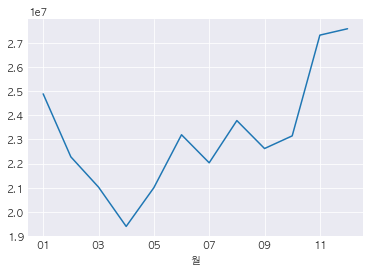

In [265]:
df.groupby(['월']).mean()['취급액'].plot()

## 소비층에 따른 분류 

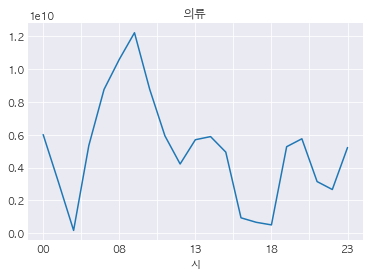

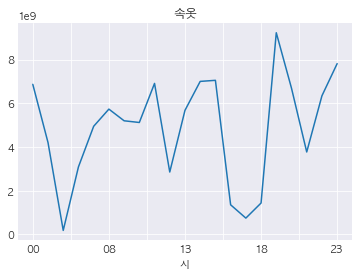

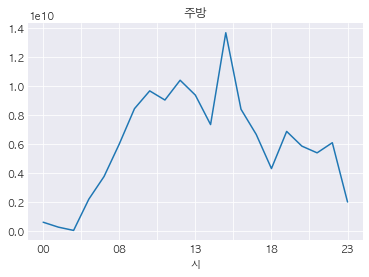

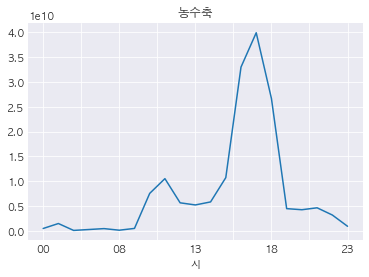

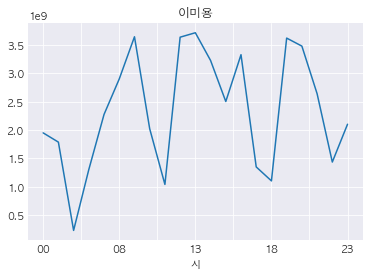

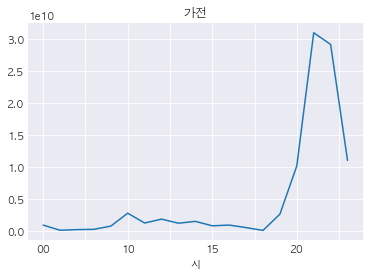

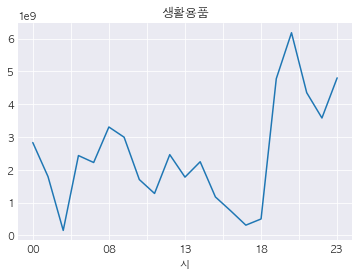

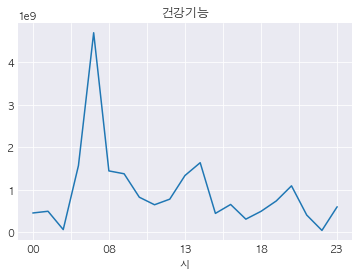

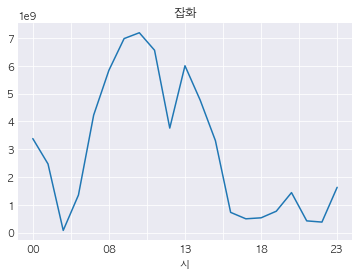

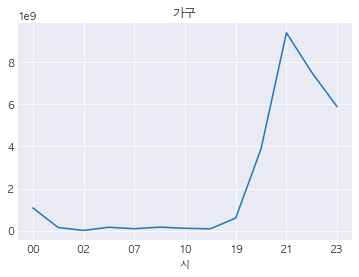

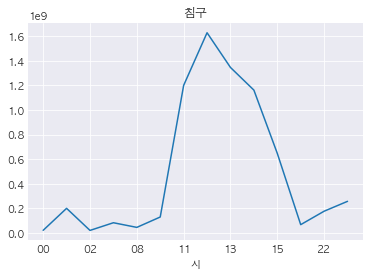

In [262]:
for i in df['상품군'].unique():
    df[df['상품군'] == i].groupby(['시']).sum()['취급액'].plot()
    plt.title(i)
    plt.show()

실버(새벽시간): 건강 0 

미시(아침시간): 의류, 잡화, 1  

중년(오후시간): 주방, 농수축, 2

가족(저녁시간): 가전, 생활용품, 가구 3

이미용, 속옷 4

In [62]:
def consumer_group(x):
    if x == '건강': return 0 #실버 소비자
    elif x == '의류' or x == '잡화': return 1 #미시 소비자
    elif x == '주방' or x == '농수축': return 2 #중년 주부 소비자
    elif x == '가전' or x == '생활용품' or x == '가구': return 3 #가족 단위 소비자
    else: return 4 #기타

In [63]:
df['소비층'] = df['상품군'].apply(lambda x: consumer_group(x))
df

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,평균 시청률,평균단가,평균개수,년,월,일,시,분,소비층
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,0.000000,39900.0,52.606516,2019,01,01,06,00,1
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,0.000000,39900.0,109.548872,2019,01,01,06,00,1
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,0.000000,39900.0,81.754386,2019,01,01,06,20,1
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,0.000000,39900.0,174.310777,2019,01,01,06,20,1
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,0.000000,39900.0,167.218045,2019,01,01,06,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38295,2019-12-31 23:20:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,1664000.0,0.000000,148000.0,11.243243,2019,12,31,23,20,2
38296,2019-12-31 23:40:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,9149000.0,0.020222,178000.0,51.398876,2019,12,31,23,40,2
38297,2019-12-31 23:40:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,15282000.0,0.020222,168000.0,90.964286,2019,12,31,23,40,2
38298,2019-12-31 23:40:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,2328000.0,0.020222,158000.0,14.734177,2019,12,31,23,40,2


## 요일추가 

In [64]:
import datetime
df['방송일시'] = df['방송일시'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S' ))
df

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,평균 시청률,평균단가,평균개수,년,월,일,시,분,소비층
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,0.000000,39900.0,52.606516,2019,01,01,06,00,1
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,0.000000,39900.0,109.548872,2019,01,01,06,00,1
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,0.000000,39900.0,81.754386,2019,01,01,06,20,1
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,0.000000,39900.0,174.310777,2019,01,01,06,20,1
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,0.000000,39900.0,167.218045,2019,01,01,06,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38295,2019-12-31 23:20:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,1664000.0,0.000000,148000.0,11.243243,2019,12,31,23,20,2
38296,2019-12-31 23:40:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,9149000.0,0.020222,178000.0,51.398876,2019,12,31,23,40,2
38297,2019-12-31 23:40:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,15282000.0,0.020222,168000.0,90.964286,2019,12,31,23,40,2
38298,2019-12-31 23:40:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,2328000.0,0.020222,158000.0,14.734177,2019,12,31,23,40,2


In [65]:
df['요일'] = df['방송일시'].apply(lambda x: x.strftime('%A'))
df

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,평균 시청률,평균단가,평균개수,년,월,일,시,분,소비층,요일
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,0.000000,39900.0,52.606516,2019,01,01,06,00,1,Tuesday
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,0.000000,39900.0,109.548872,2019,01,01,06,00,1,Tuesday
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,0.000000,39900.0,81.754386,2019,01,01,06,20,1,Tuesday
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,0.000000,39900.0,174.310777,2019,01,01,06,20,1,Tuesday
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,0.000000,39900.0,167.218045,2019,01,01,06,40,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38295,2019-12-31 23:20:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,1664000.0,0.000000,148000.0,11.243243,2019,12,31,23,20,2,Tuesday
38296,2019-12-31 23:40:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,9149000.0,0.020222,178000.0,51.398876,2019,12,31,23,40,2,Tuesday
38297,2019-12-31 23:40:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,15282000.0,0.020222,168000.0,90.964286,2019,12,31,23,40,2,Tuesday
38298,2019-12-31 23:40:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,2328000.0,0.020222,158000.0,14.734177,2019,12,31,23,40,2,Tuesday


## 할인여부 

In [81]:
def binary(x):
    if x ==0: return 0 #할인상품 아니다
    else :return 1 #할인상품이다

In [82]:
df['할인상품'] = df['할인금액'].apply(lambda x: binary(x)) #
df

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가_x,취급액,평균 시청률,평균단가,...,월,일,시,분,소비층,요일,판매단가_y,할인금액,취급액_log,할인상품
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,0.000000,39900.0,...,01,01,06,00,1,Tuesday,39900,0,14.556972,0
1,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,0.000000,39900.0,...,01,01,06,20,1,Tuesday,39900,0,14.997851,0
2,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,0.000000,39900.0,...,01,01,06,40,1,Tuesday,39900,0,15.713430,0
3,2019-01-03 00:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,7329000.0,0.000000,39900.0,...,01,03,00,00,1,Thursday,39900,0,15.807350,0
4,2019-01-03 00:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,10481000.0,0.000000,39900.0,...,01,03,00,20,1,Thursday,39900,0,16.165075,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35370,2019-12-31 17:40:00,20.0,100236,200806,벨라홈 스마트 멀티포트 1+1 세트,주방,39800,60256000.0,0.002611,39800.0,...,12,31,17,40,2,Tuesday,39800,0,17.914113,0
35371,2019-12-31 18:00:00,20.0,100236,200806,벨라홈 스마트 멀티포트 1+1 세트,주방,39800,57461000.0,0.000000,39800.0,...,12,31,18,00,2,Tuesday,39800,0,17.866617,0
35372,2019-12-30 16:20:00,20.0,100415,201314,코몽트 기모 터틀넥 5종,의류,39900,16526000.0,0.001000,39900.0,...,12,30,16,20,1,Monday,39900,0,16.620446,0
35373,2019-12-30 16:40:00,20.0,100415,201314,코몽트 기모 터틀넥 5종,의류,39900,28312000.0,0.001111,39900.0,...,12,30,16,40,1,Monday,39900,0,17.158796,0


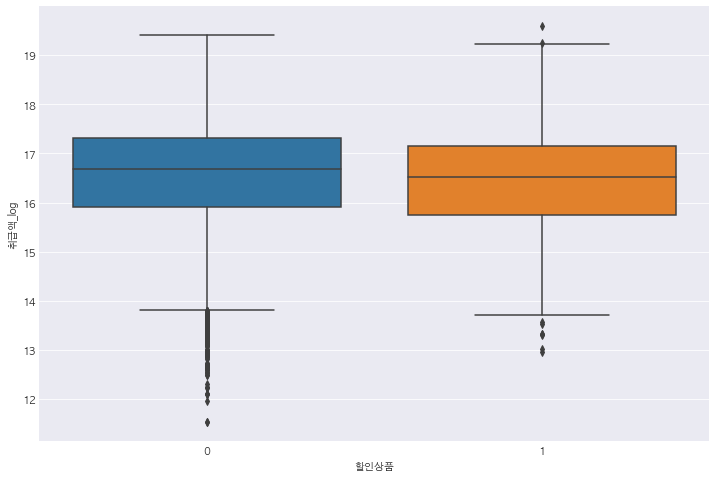

In [85]:
data = pd.concat([df['취급액_log'], df['할인상품']], axis = 1) 
f, ax = plt.subplots(figsize = (12, 8))
fig = sns.boxplot(x = '할인상품', y = '취급액_log', data = data)
plt.show()

할인했는지 여부는 그렇게 중요하지 않은 것 같다...

In [87]:
del df['할인상품']
del df['할인금액']
del df['판매단가_y']

In [89]:
del df['평균단가']

In [98]:
df.columns.values[6] = '판매단가'
df

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,평균 시청률,평균개수,년,월,일,시,분,소비층,요일,취급액_log
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,0.000000,52.606516,2019,01,01,06,00,1,Tuesday,14.556972
1,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,0.000000,81.754386,2019,01,01,06,20,1,Tuesday,14.997851
2,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,0.000000,167.218045,2019,01,01,06,40,1,Tuesday,15.713430
3,2019-01-03 00:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,7329000.0,0.000000,183.684211,2019,01,03,00,00,1,Thursday,15.807350
4,2019-01-03 00:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,10481000.0,0.000000,262.681704,2019,01,03,00,20,1,Thursday,16.165075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35370,2019-12-31 17:40:00,20.0,100236,200806,벨라홈 스마트 멀티포트 1+1 세트,주방,39800,60256000.0,0.002611,1513.969849,2019,12,31,17,40,2,Tuesday,17.914113
35371,2019-12-31 18:00:00,20.0,100236,200806,벨라홈 스마트 멀티포트 1+1 세트,주방,39800,57461000.0,0.000000,1443.743719,2019,12,31,18,00,2,Tuesday,17.866617
35372,2019-12-30 16:20:00,20.0,100415,201314,코몽트 기모 터틀넥 5종,의류,39900,16526000.0,0.001000,414.185464,2019,12,30,16,20,1,Monday,16.620446
35373,2019-12-30 16:40:00,20.0,100415,201314,코몽트 기모 터틀넥 5종,의류,39900,28312000.0,0.001111,709.573935,2019,12,30,16,40,1,Monday,17.158796


## 평일, 주말, 공휴일 구분 

In [32]:
def get_holiday(x):
    date = str(x.월) +'-'+ str(x.일)
    holiday = ['01-01', '02-04', '02-05', '02-06', '03-01', '05-05', '05-06', '05-12',
               '06-06', '08-15', '09-12', '09-13', '09-14', '10-03', '10-09', '12-25']
    if date in holiday :
        return 2
    if x.요일 == 'Saturday' or x.요일 == 'Sunday': return 1
    else:
        return 0

df['휴일'] = df.apply(lambda x: get_holiday(x), axis = 1)

In [33]:
df

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,평균단가,년,월,일,시,분,소비층,요일,휴일
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,39900.0,2019,01,01,06,00,1,Tuesday,2
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,39900.0,2019,01,01,06,00,1,Tuesday,2
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,39900.0,2019,01,01,06,20,1,Tuesday,2
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,39900.0,2019,01,01,06,20,1,Tuesday,2
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,39900.0,2019,01,01,06,40,1,Tuesday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35370,2019-12-31 23:20:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,1664000.0,148000.0,2019,12,31,23,20,2,Tuesday,0
35371,2019-12-31 23:40:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,9149000.0,178000.0,2019,12,31,23,40,2,Tuesday,0
35372,2019-12-31 23:40:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,15282000.0,168000.0,2019,12,31,23,40,2,Tuesday,0
35373,2019-12-31 23:40:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,2328000.0,158000.0,2019,12,31,23,40,2,Tuesday,0


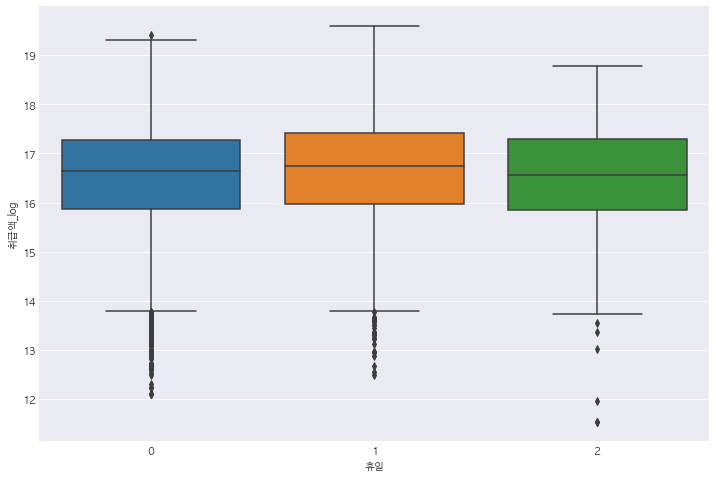

In [101]:
data = pd.concat([df['취급액_log'], df['휴일']], axis = 1) 
f, ax = plt.subplots(figsize = (12, 8))
fig = sns.boxplot(x = '휴일', y = '취급액_log', data = data)
plt.show()

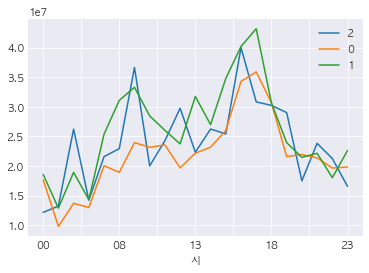

In [110]:
#휴일 취급액
for i in df['휴일'].unique():
    df[df['휴일'] == i].groupby(['시']).mean()['취급액'].plot()
    plt.legend(df['휴일'].unique())

## Prime Time

주요 시간대(아침, 저녁 8시부터 11시)를 설정

In [118]:
def get_prime(x):
    prime_bn = map(str,[8, 9, 10, 11])
    prime_an = map(str,[20,21, 22, 23])
    
    x = x
    #print(x)
    if x in prime_bn or x in prime_an:
        return 1
    else:
        return 0

df['프라임'] = df['시'].map(lambda x: get_prime(x))

In [119]:
df

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,평균 시청률,평균개수,년,월,일,시,분,소비층,요일,취급액_log,휴일,프라임
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,0.000000,52.606516,2019,01,01,06,00,1,Tuesday,14.556972,2,0
1,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,0.000000,81.754386,2019,01,01,06,20,1,Tuesday,14.997851,2,0
2,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,0.000000,167.218045,2019,01,01,06,40,1,Tuesday,15.713430,2,0
3,2019-01-03 00:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,7329000.0,0.000000,183.684211,2019,01,03,00,00,1,Thursday,15.807350,0,0
4,2019-01-03 00:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,10481000.0,0.000000,262.681704,2019,01,03,00,20,1,Thursday,16.165075,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35370,2019-12-31 17:40:00,20.0,100236,200806,벨라홈 스마트 멀티포트 1+1 세트,주방,39800,60256000.0,0.002611,1513.969849,2019,12,31,17,40,2,Tuesday,17.914113,0,0
35371,2019-12-31 18:00:00,20.0,100236,200806,벨라홈 스마트 멀티포트 1+1 세트,주방,39800,57461000.0,0.000000,1443.743719,2019,12,31,18,00,2,Tuesday,17.866617,0,0
35372,2019-12-30 16:20:00,20.0,100415,201314,코몽트 기모 터틀넥 5종,의류,39900,16526000.0,0.001000,414.185464,2019,12,30,16,20,1,Monday,16.620446,0,0
35373,2019-12-30 16:40:00,20.0,100415,201314,코몽트 기모 터틀넥 5종,의류,39900,28312000.0,0.001111,709.573935,2019,12,30,16,40,1,Monday,17.158796,0,0


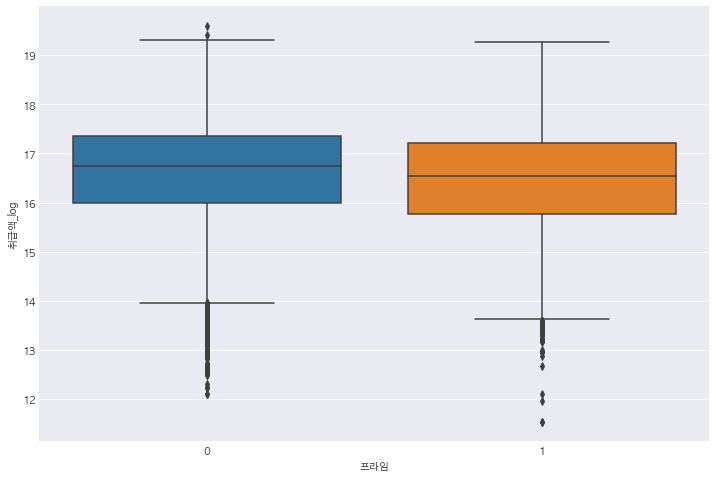

In [120]:
data = pd.concat([df['취급액_log'], df['프라임']], axis = 1) 
f, ax = plt.subplots(figsize = (12, 8))
fig = sns.boxplot(x = '프라임', y = '취급액_log', data = data)
plt.show()

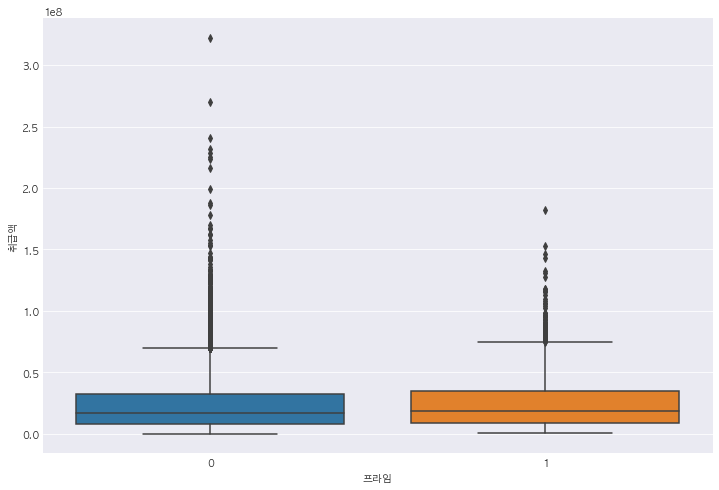

In [116]:
data = pd.concat([df['취급액'], df['프라임']], axis = 1) 
f, ax = plt.subplots(figsize = (12, 8))
fig = sns.boxplot(x = '프라임', y = '취급액', data = data)
plt.show()

## EDA

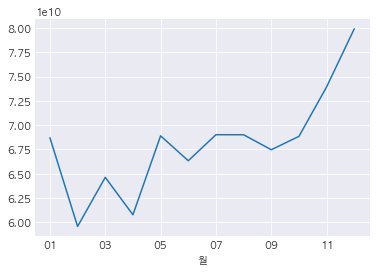

In [296]:
df.groupby(['월']).sum()['취급액'].plot()

V라이브가 4월부터 시작

-> 4월부터 취급액이 올라갔는데 연관성이 있을지...?

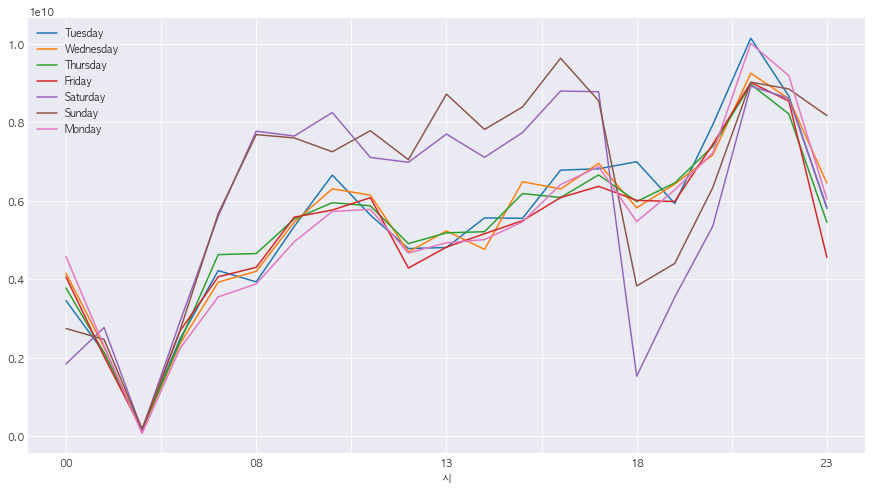

In [294]:
#요일별 취급액
plt.figure(figsize = (15, 8))
for i in df['요일'].unique():
    df[df['요일'] == i].groupby(['시']).sum()['취급액'].plot()
    plt.legend(df['요일'].unique())

이혜정의 빅쇼: 화요일 오후 6:30
김선희의 lounge v: 수 오전 11:35, 목 오전 10:25
김성은의 스타일프로포즈: 수 오후 10:50


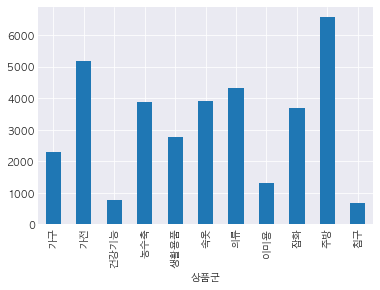

In [204]:
df.groupby(['상품군']).count()['방송일시'].plot(kind = 'bar')

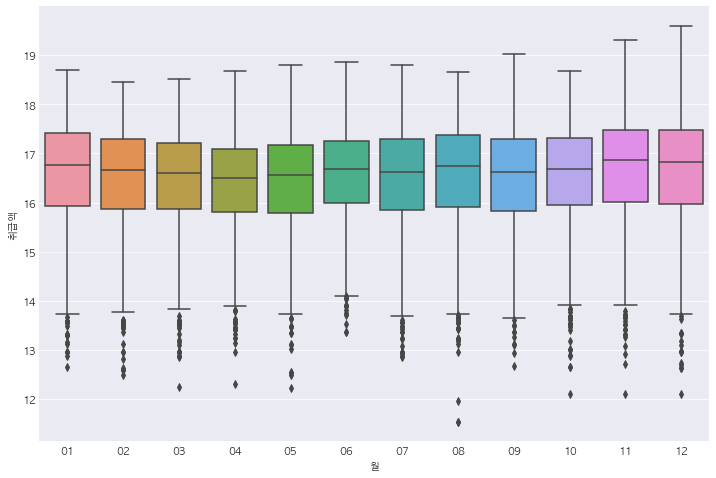

In [288]:
data = pd.concat([np.log1p(df['취급액']), df['월']], axis = 1) 
f, ax = plt.subplots(figsize = (12, 8))
fig = sns.boxplot(x = '월', y = '취급액', data = data)
plt.show()

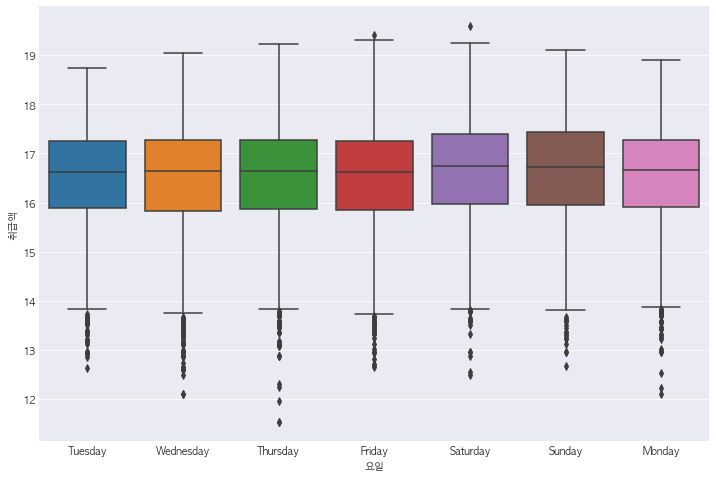

In [284]:
data = pd.concat([np.log1p(df['취급액']), df['요일']], axis = 1) 
f, ax = plt.subplots(figsize = (12, 8))
fig = sns.boxplot(x = '요일', y = '취급액', data = data)
plt.show()

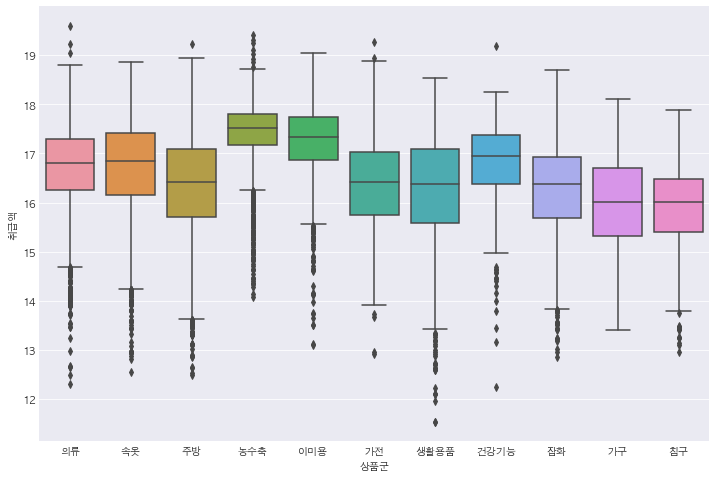

In [118]:
data = pd.concat([np.log1p(df['취급액']), df['상품군']], axis = 1) 
f, ax = plt.subplots(figsize = (12, 8))
fig = sns.boxplot(x = '상품군', y = '취급액', data = data)
plt.show()

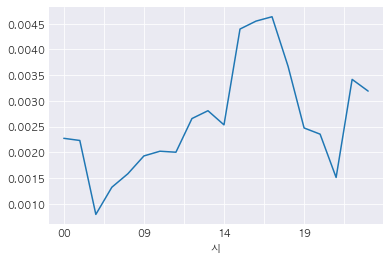

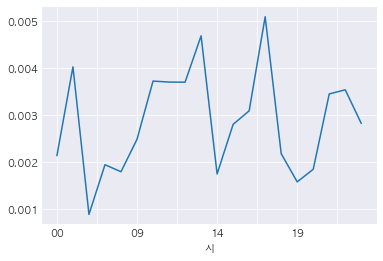

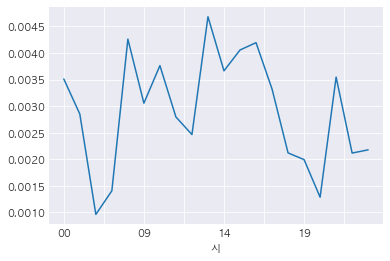

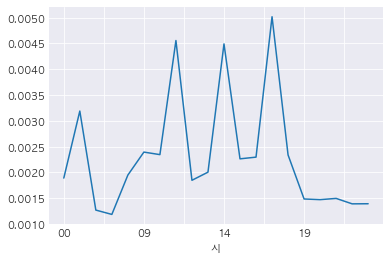

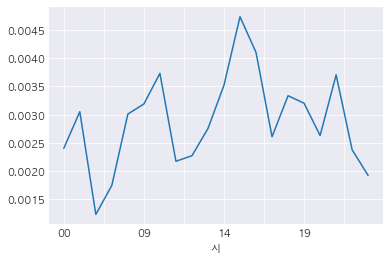

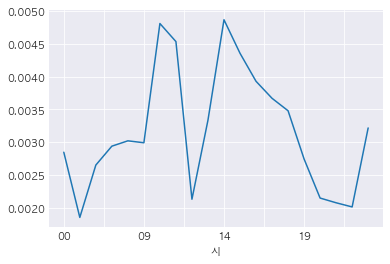

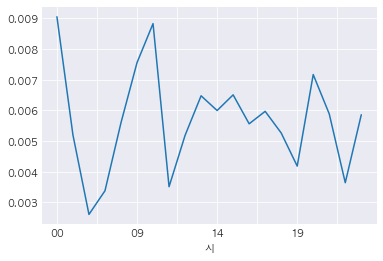

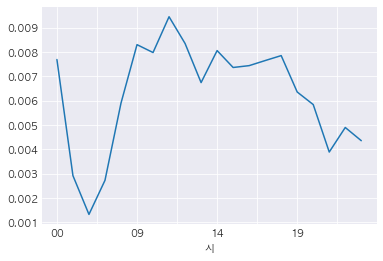

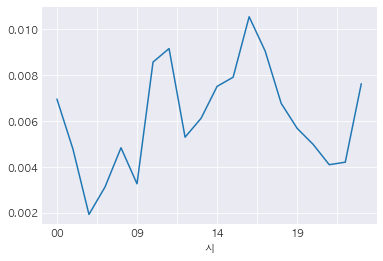

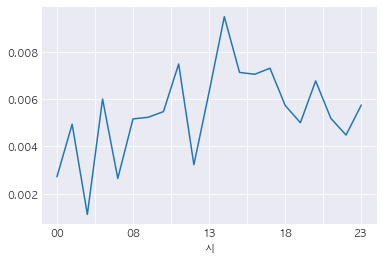

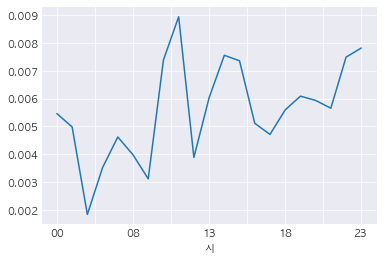

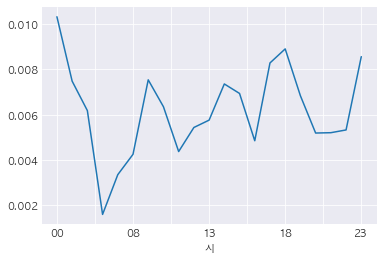

In [101]:
for i in df['월'].unique():
    df[df['월'] == i].groupby(['시']).mean()['평균 시청률'].plot()
    plt.show()

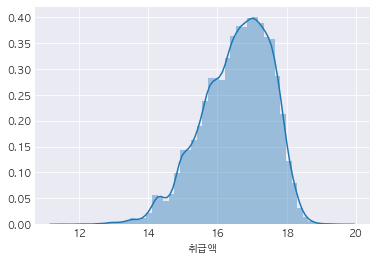

In [22]:
sns.distplot(np.log1p(df['취급액']))
plt.show()

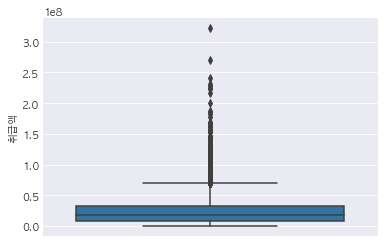

In [24]:
sns.boxplot(y = '취급액', data = df)
plt.show()

In [25]:
df['취급액_log'] = np.log1p(df['취급액'])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


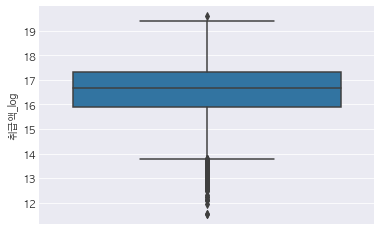

In [26]:
sns.boxplot(y = '취급액_log', data = df)
plt.show()

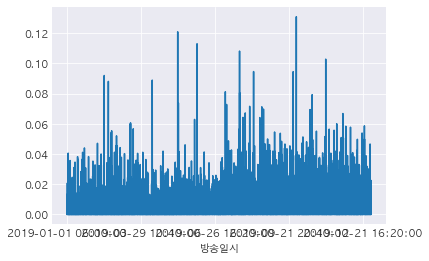

In [44]:

df.groupby(['방송일시']).mean()['평균 시청률'].plot()

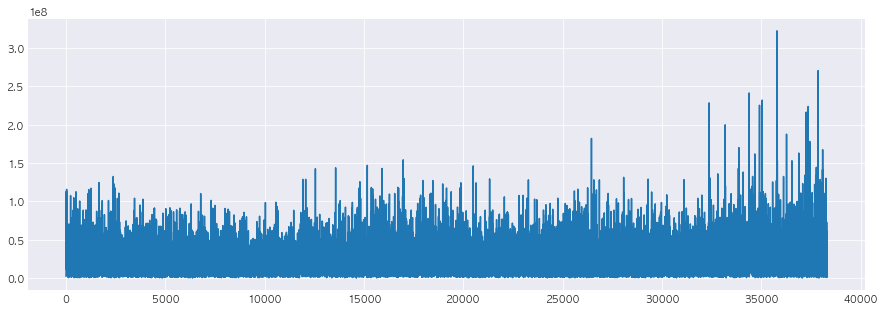

In [36]:
#취급액 변화가 어떤지?
plt.figure(figsize = (15, 5))
sns.lineplot(data = df['취급액'])

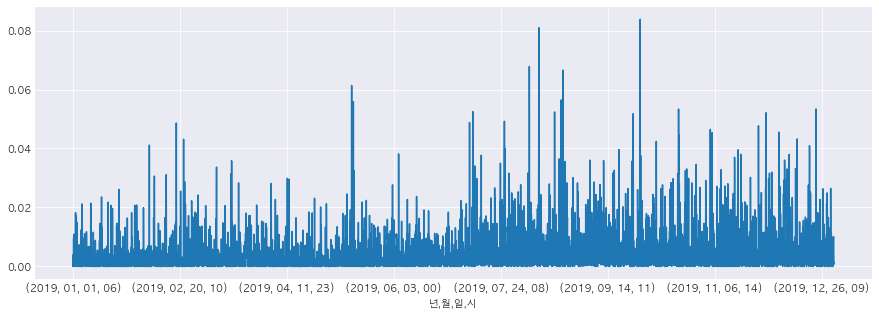

In [127]:
plt.figure(figsize = (15, 5))
df.groupby(['년', '월', '일','시']).mean()['평균 시청률'].plot()

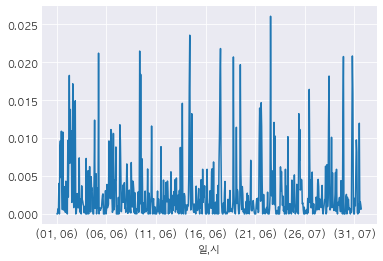

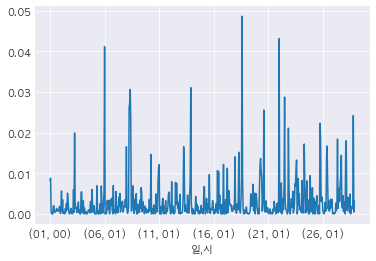

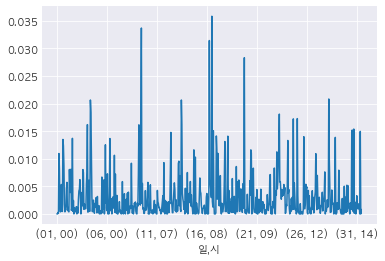

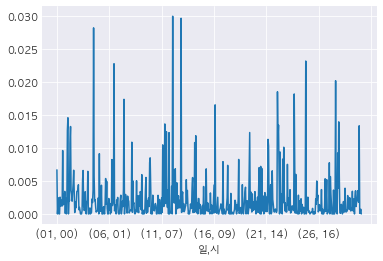

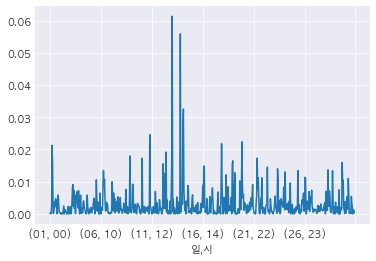

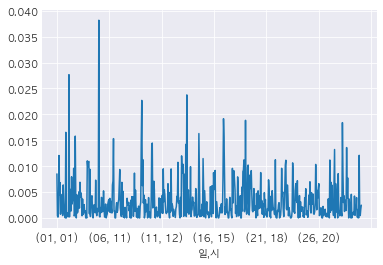

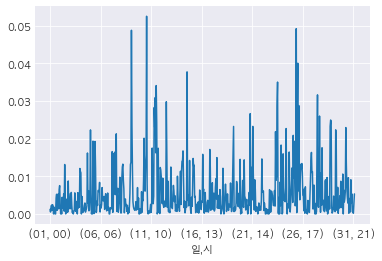

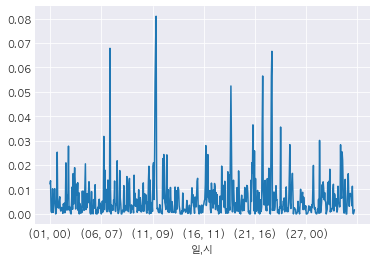

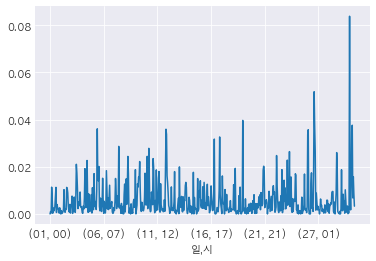

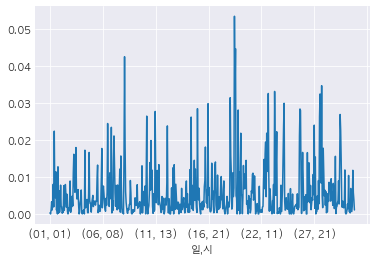

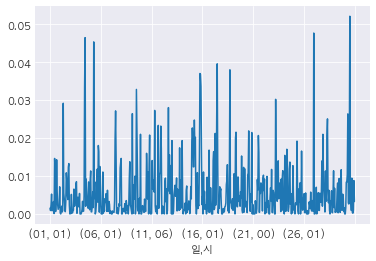

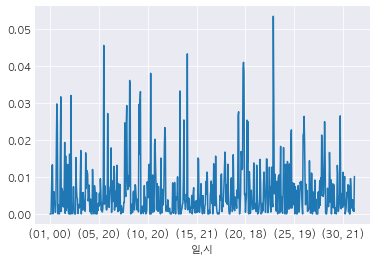

In [133]:
for i in range(1, 13):
    if i < 10: i = '0' + str(i)
    df[df['월'] == str(i)].groupby(['일', '시']).mean()['평균 시청률'].plot()
    plt.show()

연말로 갈 수록 취급액이 높아지는 것을 알 수 있다

In [34]:
df.to_csv('20200910.csv')